## Prosper Loan

### by Titilope Onabajo

### Introduction

In [2]:
###### import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.ticker as mtick

%matplotlib inline

In [3]:
# load in the dataset into a pandas dataframe, print statistics
loan = pd.read_csv('prosperLoanData.csv')

### Preliminary Wrangling

In [4]:
print(loan.shape)
print(loan.dtypes)
loan.head(10)

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [5]:
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [6]:
# see number of null values on each columns
loan.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [7]:
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)

In [8]:
loan_clean = loan.copy()

In [9]:
loan_clean.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [10]:
#check for duplicates
sum(loan_clean.duplicated())

0

In [11]:
# Subset the dataframe by selecting features of interest
loan_clean = loan_clean[['LoanOriginalAmount','IncomeRange','CreditGrade','LoanStatus','BorrowerAPR', 'BorrowerRate', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
        'ProsperRating (numeric)','BorrowerState','Occupation','EmploymentStatus','EstimatedReturn','EstimatedLoss', 'DebtToIncomeRatio']]
df = loan_clean

In [12]:
df.head()

,LoanOriginalAmount,IncomeRange,CreditGrade,LoanStatus,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,Term,ProsperRating (Alpha),ProsperRating (numeric),BorrowerState,Occupation,EmploymentStatus,EstimatedReturn,EstimatedLoss,DebtToIncomeRatio
0,9425,"$25,000-49,999",C,Completed,0.16516,0.1580,3083.333333,36,NaN,NaN,CO,Other,Self-employed,NaN,NaN,0.17
1,10000,"$50,000-74,999",NaN,Current,0.12016,0.0920,6125.000000,36,A,6.0,CO,Professional,Employed,0.05470,0.0249,0.18
2,3001,Not displayed,HR,Completed,0.28269,0.2750,2083.333333,36,NaN,NaN,GA,Other,Not available,NaN,NaN,0.06
3,10000,"$25,000-49,999",NaN,Current,0.12528,0.0974,2875.000000,36,A,6.0,GA,Skilled Labor,Employed,0.06000,0.0249,0.15
4,15000,"$100,000+",NaN,Current,0.24614,0.2085,9583.333333,36,D,3.0,MN,Executive,Employed,0.09066,0.0925,0.26


In [13]:
df.shape

(113937, 16)

In [14]:
#check for duplicates
sum(df.duplicated())

909

In [15]:
# see number of null values on each columns
df.isnull().sum()

LoanOriginalAmount             0
IncomeRange                    0
CreditGrade                84984
LoanStatus                     0
BorrowerAPR                   25
BorrowerRate                   0
StatedMonthlyIncome            0
Term                           0
ProsperRating (Alpha)      29084
ProsperRating (numeric)    29084
BorrowerState               5515
Occupation                  3588
EmploymentStatus            2255
EstimatedReturn            29084
EstimatedLoss              29084
DebtToIncomeRatio           8554
dtype: int64

In [16]:
df.shape

(113937, 16)

### What is the structure of your dataset?

> A data set from Prosper, which is America’s first marketplace lending platform, with over $7 billion in funded loans. This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, borrower employment status, borrower credit history, and the latest payment information.

### What is/are the main feature(s) of interest in your dataset?

> The Borrower's APR will be analyzed with many factors such as the borrower's rating, score, income etc. that could influence change in borrower's APR.
Let's also look into what factors are responsible in affecting  loan's interest rate.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The data for exploration now contains 112,347 rows and 14 columns on interest. The 13 columns selected are features that would make the exploration more focused into discovering insights in the data set.

The features that could help in this investigation are:
- `LoanOriginalAmount`,`IncomeRange`,`CreditGrade`,`LoanStatus`,`BorrowerAPR`, `BorrowerRate`, `StatedMonthlyIncome`, `Term`, `ProsperRating (Alpha)`,`ProsperRating (numeric)`,`EmploymentStatus`,`EstimatedReturn`,`EstimatedLoss`, `DebtToIncomeRatio`

`Borrower's APR` and `Loan's interest interest` are most likely affected  by the rest of the features listed above because higher rating reflect the borrower's personality to be more trustworthy. Creditscore could also have similar effect on Borrower's
APR as Prosper Rating.Loan's interest rate can also be affected by characteristics like `Monthly Income`,`BorrowerRate`, `Occupation` etc.

## Univariate Exploration


### How is Borrower Rate distributed?

>  * Borrower's APR rate has a bimodal distribution of, the most frequent APR for borrowing is 30%, followed by 15%,16% and 20% respectively.

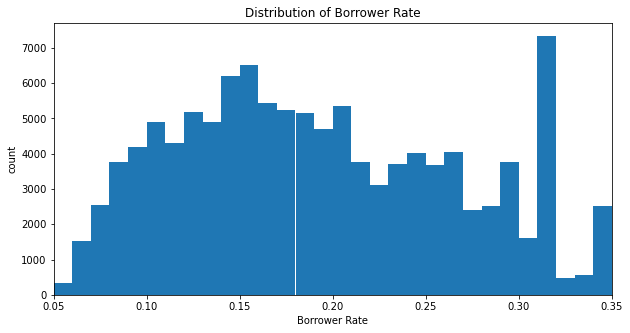

In [48]:
# Plot the distribution of BorrowerRate
bins = np.arange(df['BorrowerRate'].min(), df['BorrowerRate'].max(), 0.01)

plt.figure(figsize = [10, 5])

plt.hist(data=df, x='BorrowerRate', bins=bins)


plt.xlabel('Borrower Rate');
plt.ylabel('count')
plt.title('Distribution of Borrower Rate')
plt.xlim(0.05,0.35);


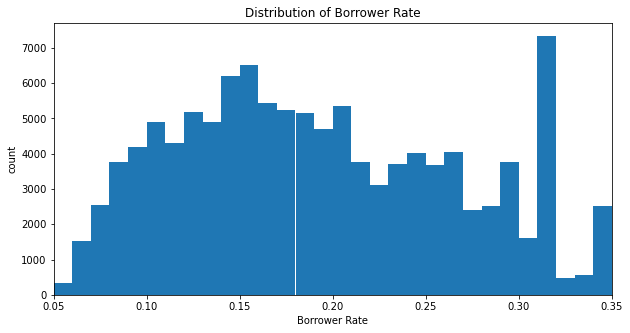

> **Comments:** This chart depicts a bimodal distribution of borrower rate, the most frequent APR for borrowing is 30%, followed by 15%,16% and 20% respectively. It will be of further interests to further explore what determines the APR set for each borrower. 


### 2. What is the Employment Status of Borrowers?

In [18]:
employee_count = df['EmploymentStatus'].value_counts()
employee_count

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

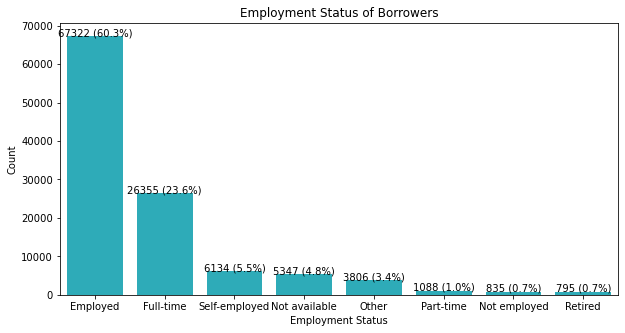

In [19]:
#ploting the bar chart
plt.figure(figsize=[10,5])
color=sb.color_palette()[9]
sb.countplot(data=df,x="EmploymentStatus",color=color,order=df['EmploymentStatus'].value_counts().index);

# ploting the percentage above each column
locs,labels=plt.xticks(rotation = 0)

for loc,label in zip(locs,labels):
    employeecount= employee_count[label.get_text()]
    pct_string= '{} ({:0.1f}%)'.format(employeecount, 100*employeecount/df['EmploymentStatus'].notnull().sum())
    plt.text(x=loc, y=employeecount,s=pct_string,ha="center",fontsize=10)

#labels and title
plt.xlabel("Employment Status")
plt.ylabel("Count")
plt.title("Employment Status of Borrowers");

> **Comment**: A very high percentage of borrowers are employed. This is a good metrics for the loan company, as employment status is a very important metrics of determining borrowers credibility in obtaining loans and the amount that can be lent to each borrower. It will of futher interest to know the income range of borrowers.

### What is the Income Range of Borrowers?

Comment: 62% of people who borrow from Prosper Loans earn between 0 - 75,000, and 30% earn above 75,000; whilst the 8% remaining fall within 0, not employed and Not displayed

In [20]:
income_range =df["IncomeRange"].value_counts()
income_range

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

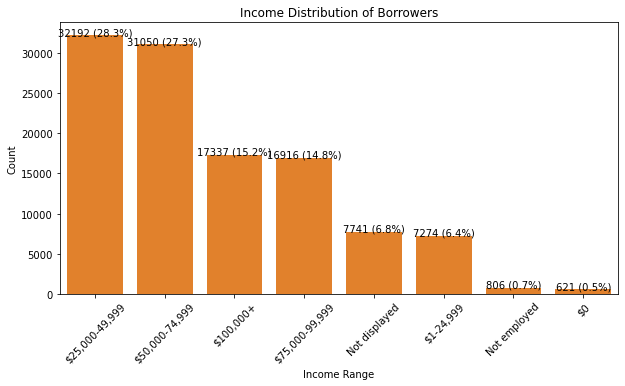

In [21]:
#ploting the bar chart
plt.figure(figsize=[10,5])
color=sb.color_palette()[1]
sb.countplot(data=df,x='IncomeRange',color=color, order=df['IncomeRange'].value_counts().index);

# ploting the percentage above each column
locs,labels=plt.xticks(rotation = 45)

for loc,label in zip(locs,labels):
    incomerange=income_range[label.get_text()]
    pct_string='{} ({:0.1f}%)'.format(incomerange, 100*incomerange/df['IncomeRange'].notnull().sum())
    plt.text(x=loc,y=incomerange, s=pct_string,ha="center",fontsize=10)

#labels and title
plt.xlabel("Income Range")
plt.ylabel("Count")
plt.title("Income Distribution of Borrowers");

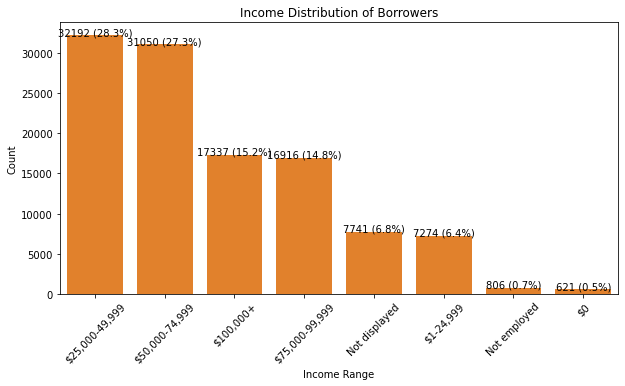

> **Comment**:  62% of people who borrow from Prosper Loans earn between 0 - 75,000, and 30% earn above 75,000; whilst the 8% remaining fall within 0, not employed and Not displayed.

### 4.  Debt to Income Ratio

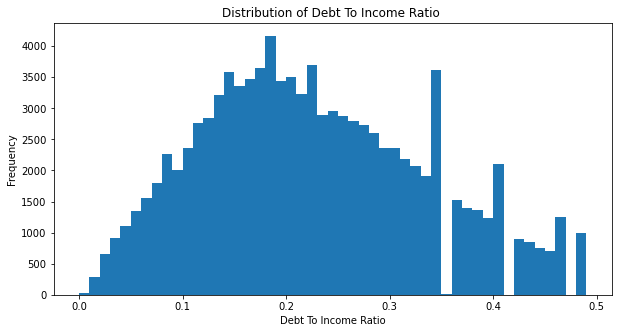

In [22]:
plt.figure(figsize=[10,5])

# ploting the new values
plt.hist(data=df, x='DebtToIncomeRatio', bins=bins);

# lables and title for the graph
plt.xlabel("Debt To Income Ratio")
plt.ylabel("Frequency")
plt.title("Distribution of Debt To Income Ratio ");

> **Comment**: Largely the debt to Income ratio of borrowers concentrates around the 13% - 23%, after which there is a decline in the distribution except at 34%, 41% and 47%

### Distribution of Each Class of Ratings

> The distribution above depicts that the most common rating is C, while on an overall level credit ratings A,B,C and D account for 74%. It can also be inferred that while the ratings increase sporadically between AA and A is because AA is the highest ratings and hence the scutiny and criteria to be fulfilled to attain that credit rating. Also, from Credit rating C, the numbers begin to decline, these needs to be further explored to uncover the underlying reasons behind this distribution.

In [23]:
ratings_count=df['ProsperRating (Alpha)'].value_counts()
ratings_count

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [24]:
df['ProsperRating (Alpha)'].notnull().sum()

84853

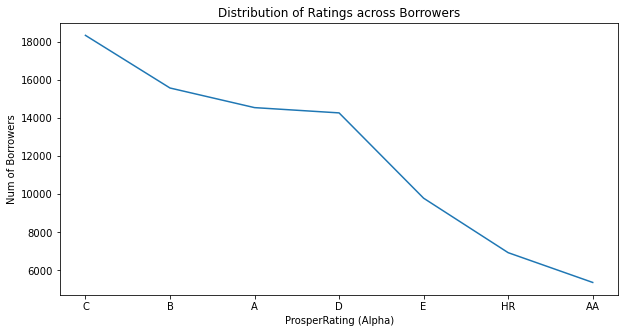

In [25]:
plt.figure(figsize=[10,5])

sb.lineplot(data=df['ProsperRating (Alpha)'].value_counts())

#labels and title
plt.xlabel("ProsperRating (Alpha)")
plt.ylabel("Num of Borrowers")
plt.title("Distribution of Ratings across Borrowers");
plt.show();

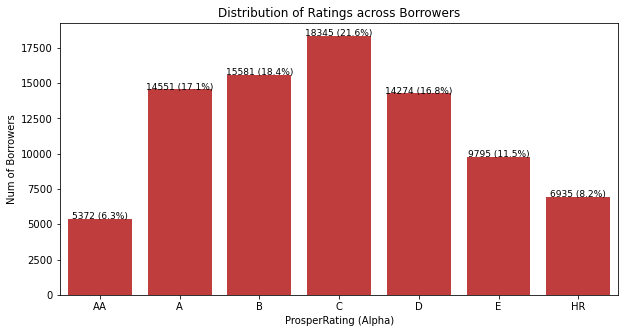

In [26]:
#ploting the bar chart order=df['EmploymentStatus'].value_counts().index

order_list = ["AA", "A", "B", "C", "D", "E", "HR"]

plt.figure(figsize=[10,5])
color=sb.color_palette()[3]
sb.countplot(data=df,x='ProsperRating (Alpha)',color=color, order=order_list);

# ploting the percentage above each column
locs,labels=plt.xticks(rotation = 0)

for loc,label in zip(locs,labels):
    ratecount=ratings_count[label.get_text()]
    pct_string= '{} ({:0.1f}%)'.format(ratecount, 100*ratecount/df['ProsperRating (Alpha)'].notnull().sum())
    plt.text(x=loc, y=ratecount,s=pct_string,ha="center",fontsize='9')

#labels and title
plt.xlabel("ProsperRating (Alpha)")
plt.ylabel("Num of Borrowers")
plt.title("Distribution of Ratings across Borrowers");

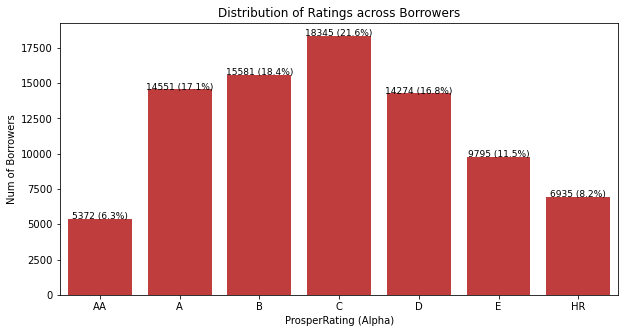

> **Comment**: The distribution above depicts that the most common rating is `C`, while on an overall level credit ratings A,B,C and D account for  74%. It can also be inferred that while the ratings increase sporadically between AA and A is because AA is the highest ratings and hence the scutiny and criteria to be fulfilled to attain that credit rating. Also,  from Credit rating `C`, the numbers begin to decline, these needs to be further explored to uncover the underlying reasons behind this distribution.

### 6. Loan Status based on Previous Loan History

In [27]:
order=df['LoanStatus'].value_counts()
order

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

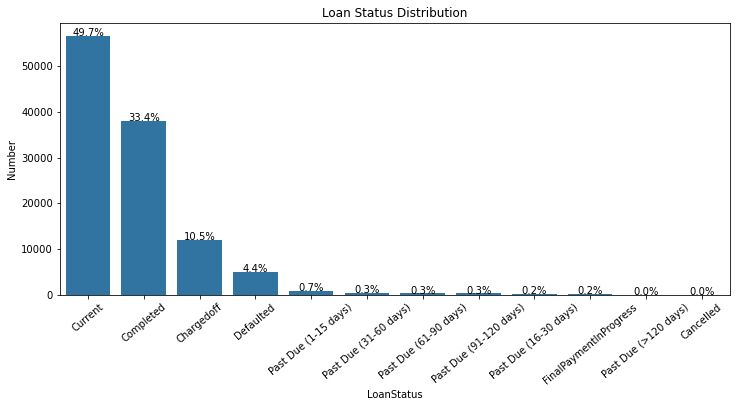

In [28]:
plt.figure(figsize=[12, 5]);

color=sb.color_palette()[0]
sb.countplot(data = df, x = 'LoanStatus', color = color, order=df['LoanStatus'].value_counts().index);

# ploting the percentage above each column
column_count=df['LoanStatus'].value_counts()
locs,labels=plt.xticks(rotation = 40)
for loc,label in zip(locs,labels):
    count=column_count[label.get_text()]
    pct_string="{:0.1f}%".format(100*count/df.shape[0])
    plt.text(loc,count+2,pct_string,ha="center",fontsize=10)

plt.title('Loan Status Distribution');
plt.ylabel('Number');
plt.xlabel('LoanStatus');

> **Comment**: This loan history shows the number of each loan status. A less than 5% default status depicts that the that the company has a good loan recovery structure in place. Almost 50% of total loan disbursed are current loans still being serviced, while 33% has been completed. It will be helpful to also consider the distribution of the loan tenure. This may explain while more than half of the loans are classified as current.

## Loan tenure distribution

> The distribution seen above provides a broad insight into the distribution of the loan term disbursed. 77% of the laon period is usually for 36 months whiile 21.5% is 60 months and 1.4% is within a year.
Moreso, the loan term policy of the Loan company might have an impact on the range amount of loan given to borrowers. In order to mitigate risk and repayment default, the company will prefer to disburse loan with repayment period of 1 - 3 years preferably, in order to recover the amount lent and make profit. This hypthesis can be confirmed using the Loan Original Amount data we have in the dataset.

In [29]:
Term=df['Term'].value_counts()
Term

36    87778
60    24545
12     1614
Name: Term, dtype: int64

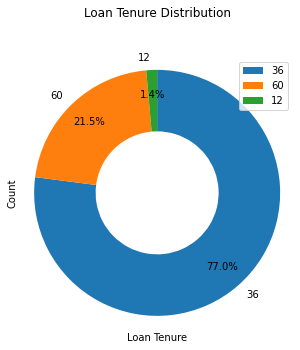

In [49]:
plt.figure(figsize=[12,5])

plt.pie(Term, labels=Term.index , startangle=90, counterclock=False, wedgeprops={'width': 0.5},
        autopct='%1.1f%%',  pctdistance=0.8);

plt.axis('square');

plt.legend()
plt.title('Loan Tenure Distribution', loc='center', pad=40);
plt.ylabel('Count');
plt.xlabel('Loan Tenure');

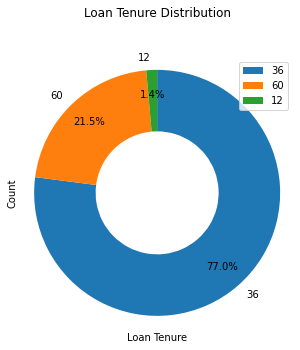

> **Comment**: 
> * The distribution seen above provides a broad insight into the distribution of the loan term disbursed. 77% of the laon period is usually for 36 months whiile 21.5% is 60 months and 1.4% is within a year. 
> * Moreso, the loan term policy of the Loan company might have an impact on the range amount of loan given to borrowers. In order to mitigate risk and repayment default, the company will prefer to disburse loan with repayment period of 1 - 3 years preferably, in order to recover the amount lent and make profit.  This hypthesis can be confirmed using the `Loan Original Amount` data we have in the dataset.

### 8. Loan Amount distribution

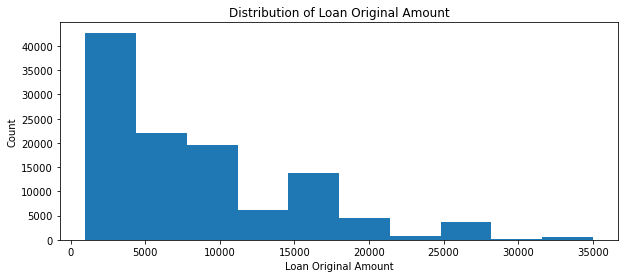

In [31]:
# Plot the distribution of Loan Amount
plt.figure(figsize=[10,4])
plt.hist(data=df, x='LoanOriginalAmount');

#labels and title
plt.xlabel("Loan Original Amount")
plt.ylabel("Count")
plt.title("Distribution of Loan Original Amount");

> **Comment**: The distribution seen above provides a broad insight into the distribution of the loan amount frequently borrowed and disbursed. However to get a better insights, the bins size will be respecified, and also xlim function was delpoyed to zero in on where there is high distribution of data.

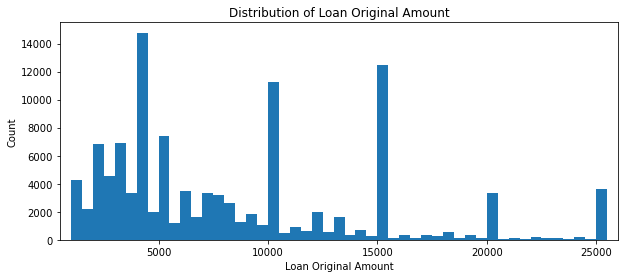

In [32]:
# Plot the distribution of Loan Amount
bins_amount = np.arange(df['LoanOriginalAmount'].min(), df['LoanOriginalAmount'].max(), 500)

plt.figure(figsize=[10,4])
plt.hist(data=df, x='LoanOriginalAmount', bins=bins_amount);

#labels and title
plt.xlabel("Loan Original Amount")
plt.ylabel("Count")
plt.title("Distribution of Loan Original Amount")
plt.xlim(500,26000);

> **Comment**: This is a much better view compared to the previous hisogram plotted. The graph is skewed to the right, with a large part of the data lying between 0 - 15,000. It can be deduced that 5,000 is the most disbursed loan amount, followed by 15,000 and 10,000 respectively.

### 9. Distibution of Loan applicants states.

In [33]:
order=df['BorrowerState'].value_counts()
order.head(8)

CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
GA     5008
OH     4197
MI     3593
Name: BorrowerState, dtype: int64

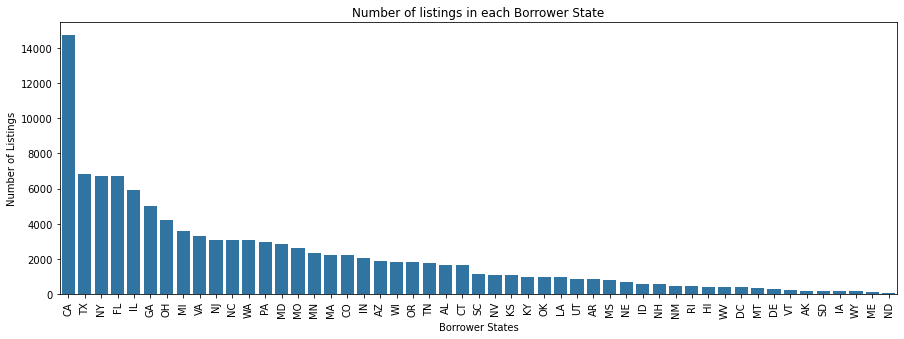

In [34]:
# Plot the distribution of Loan Amount
color = sb.color_palette()[0]

plt.figure(figsize=(15, 5))
sb.countplot(data=df,x='BorrowerState', color=color, order=order.index);

#labels and title
plt.title('Number of listings in each Borrower State');
plt.xlabel('Borrower States');
plt.ylabel('Number of Listings');

plt.xticks(rotation=90);

> **Comment**: Most of the applicants are from the CA state, followed closely by TX,NY,FL and IL being the Top 5 states where there loan applicants resides. Although, if we know the population of these states it would have been a good basis/tool to further check the validity of this output. It can be argued that demographical distribution of these states can have effect on the number of loan application from each state, as states with higher population have tendencies to have more loan applicants than states with lower population count.  

## Bivariate Exploration

In [35]:
df.head()

,LoanOriginalAmount,IncomeRange,CreditGrade,LoanStatus,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,Term,ProsperRating (Alpha),ProsperRating (numeric),BorrowerState,Occupation,EmploymentStatus,EstimatedReturn,EstimatedLoss,DebtToIncomeRatio
0,9425,"$25,000-49,999",C,Completed,0.16516,0.1580,3083.333333,36,NaN,NaN,CO,Other,Self-employed,NaN,NaN,0.17
1,10000,"$50,000-74,999",NaN,Current,0.12016,0.0920,6125.000000,36,A,6.0,CO,Professional,Employed,0.05470,0.0249,0.18
2,3001,Not displayed,HR,Completed,0.28269,0.2750,2083.333333,36,NaN,NaN,GA,Other,Not available,NaN,NaN,0.06
3,10000,"$25,000-49,999",NaN,Current,0.12528,0.0974,2875.000000,36,A,6.0,GA,Skilled Labor,Employed,0.06000,0.0249,0.15
4,15000,"$100,000+",NaN,Current,0.24614,0.2085,9583.333333,36,D,3.0,MN,Executive,Employed,0.09066,0.0925,0.26


## Correlation between Borrower's rate and Income Range Status;

> * Considering the income range and borrower's rate as well, we can identify that borrowers that fall with little or no income category have much higher rate medians than their higher income counterparts. Most likely than not, Prosper Loan determines the rate based on employment status and income range.
Looking at the income plot and  borrower's rate, there is a slight trend that median rate is lower, when the income range is hogher, except for category 0 dollars. It seems like income range is part of a determining factor for the rate a borrower will get.

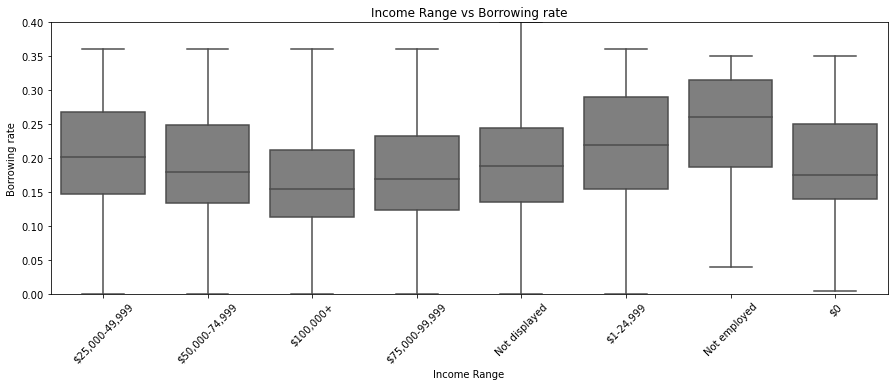

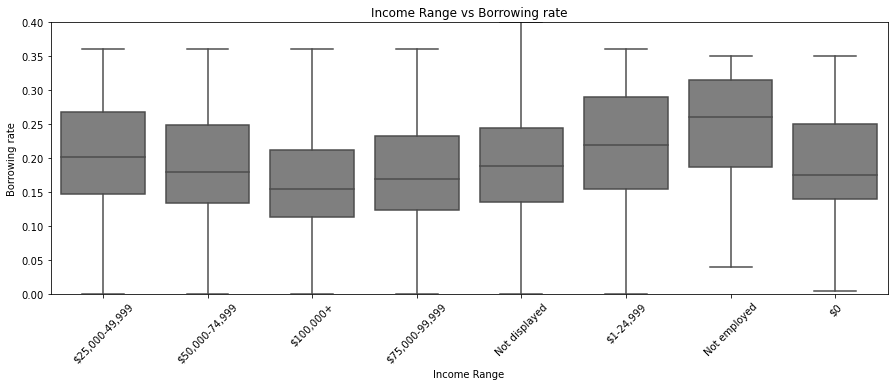

In [60]:
# bivariate plots of total loan amount vs employment status and income range
plt.figure(figsize=[15, 5]);
color = sb.color_palette()[7]

sb.boxplot(data = df, x = 'IncomeRange', y = 'BorrowerRate', color=color, order=df['IncomeRange'].value_counts().index);
plt.title('Income Range vs Borrowing rate');
plt.ylabel('Borrowing rate');
plt.xlabel('Income Range');
plt.xticks(rotation=45);
plt.ylim(0,0.4);

> **Comment:** 

> * Considering the income range and borrower's rate as well, we can identify that borrowers that fall with little or no income category have much higher rate medians than their higher income counterparts. Most likely than not, Prosper Loan determines the rate based on employment status and income range.
Looking at the income plot and  borrower's rate, there is a slight trend that median rate is lower, when the income range is hogher, except for category 0 dollars. It seems like income range is part of a determining factor for the rate a borrower will get.

## Loan Term Vs Borrower APR.

> Considering the Violin plot of Borrower APR against Loan term reveals that there is higher data points 60 months than an other category. However, the median rates for 36 months and 60 months are not so far apart, with 12 months slightly higher than the other 2 terms.
It is interesting to see that 12 month period seems to have a longer range of APR rate distribution. It can also be noticed that there is a lot of outliers for 36months, this could be due to data entry errors.

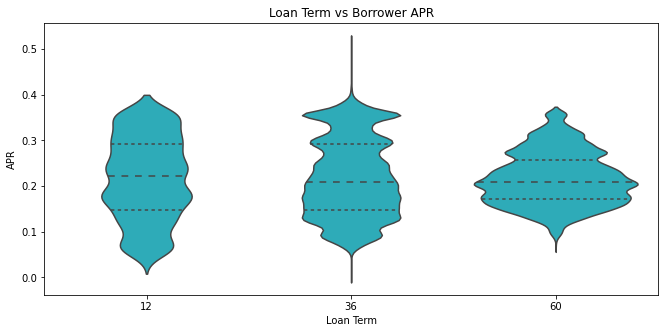

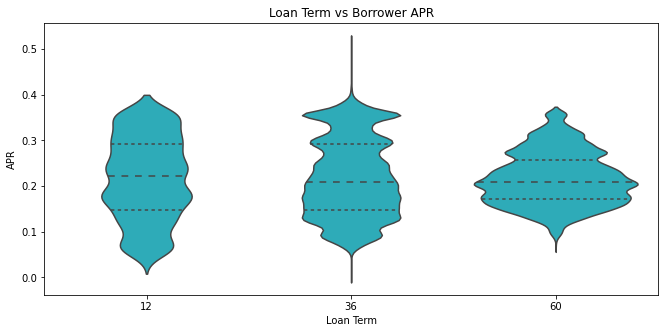

In [37]:
plt.figure(figsize = [11, 5])
color = sb.color_palette()[9]

sb.violinplot(data = df, x = 'Term', y = 'BorrowerAPR', color=color, inner="quartile");
plt.title('Loan Term vs Borrower APR');
plt.ylabel('APR');
plt.xlabel('Loan Term');

> **Comment:**
> * Considering the Violin plot of Borrower APR against Loan term reveals that there is higher data points 60 months than an other category. However, the median rates for 36 months and 60 months are not so far apart, with 12 months slightly higher than the other 2 terms.
> * It is interesting to see that 12 month period seems to have a longer range of APR rate distribution. It can also be noticed that there is a lot of outliers for 36months, this could be due to data entry errors.

### 12. Borrower Rate Vs Loan Amount

In [38]:
df['LoanOriginalAmount'].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

<Figure size 1080x288 with 0 Axes>

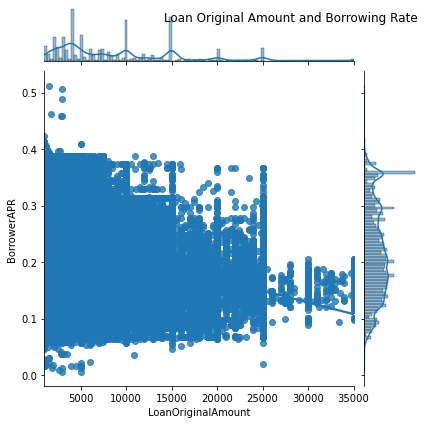

In [39]:
plt.figure(figsize = [15, 4])

sb.jointplot(data=df,x="LoanOriginalAmount",y="BorrowerAPR", kind='reg');

plt.xlabel("Loan Original Amount");
plt.ylabel("Borrower APR");
plt.title("Loan Original Amount and Borrowing Rate", loc='right', pad=50);

> **Comment:**
> * The scatterplot between Loan Original Amount and Borrower Rate depicts a weak negative relationship between the 2 variables.It seems Prosper Loan reduces the rates as the loan amount increases.
> * This might be in a way to encourage borrowers to apply for higher amount of loans after assessing that they are credit worthiness.

## Multivariate Exploration

## Borrower Rate vs Other Key Variables

<Figure size 720x432 with 0 Axes>

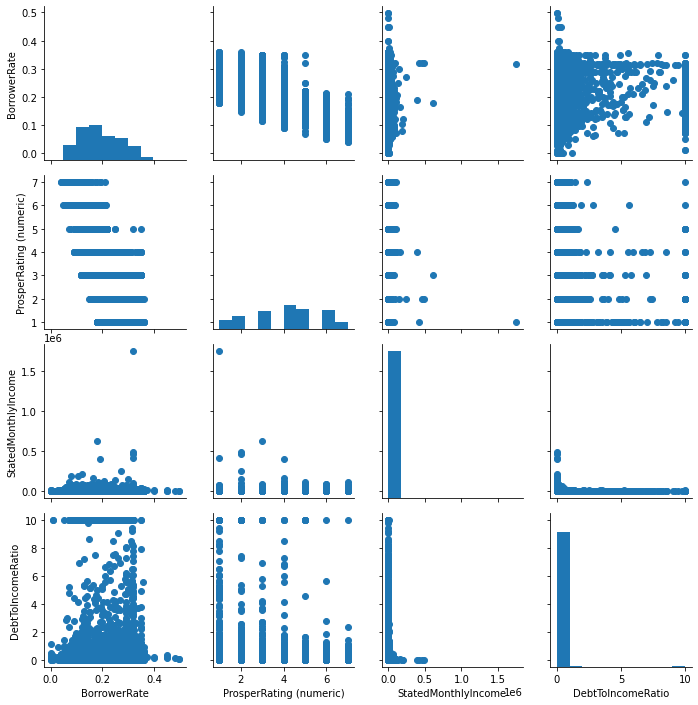

In [40]:
corr_df = df[['BorrowerRate', 'ProsperRating (numeric)', 'StatedMonthlyIncome', 'DebtToIncomeRatio']]

plt.figure(figsize = [10, 6])
g=sb.PairGrid(data=df, vars= corr_df);
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);

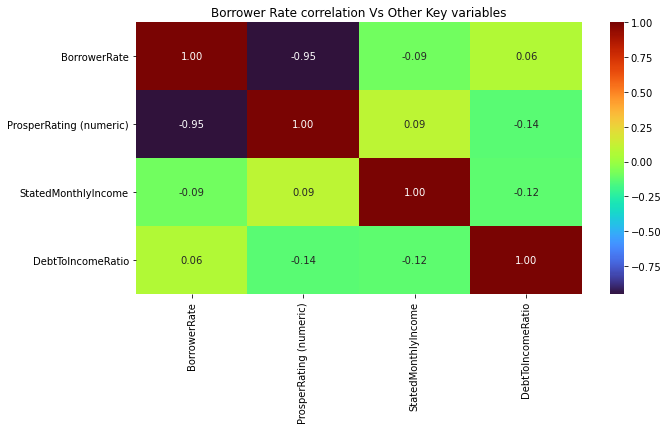

In [41]:
corr_df = df[['BorrowerRate', 'ProsperRating (numeric)', 'StatedMonthlyIncome', 'DebtToIncomeRatio']]

# correlation plot 
plt.figure(figsize = [10, 5])
sb.heatmap(corr_df.corr(), annot = True, fmt = '.2f', cmap = 'turbo')

plt.yticks(rotation=0);
plt.title('Borrower Rate correlation Vs Other Key variables')
plt.show();

> **Comments**
> * Borrower rate has a strong negative correlation with Proper ratings, weak negative correlation with Monthly Income and weak positive correlation with Debt to Income ratio.
> * ProsperRating (numeric) has a high negative correlation with Borrower Rates and weak positive correlation with monthly income.
> * And the DebtToIncomeRatio is negatively correlated with Monthly Income, though weak.

## FacetGrid of Prosper Rating (Alpha) Vs. BorrowerAPR

> This grid helps to analyze BorrowerAPR vs ProsperScore on difference letter ratings.The analysis differenate groups of people in terms of APR received based on their rating and scores.

> For high rating A(A), the borrowers has the lowers APR.
> The patterns also shows the lowerest rating(HR) of borrowers have the highest APR.
> The lower the rating, the tendencies of paying higher rates on the loan increases

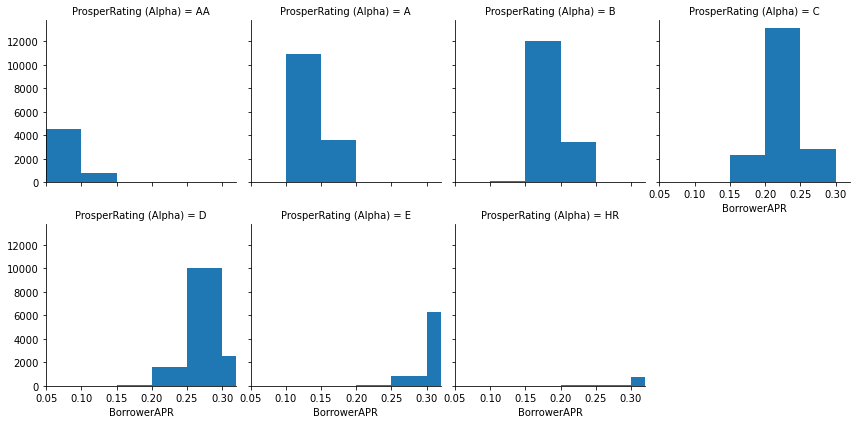

In [56]:
# Setting the bin variables.
bin_edge=np.arange(0,0.5+0.05,.05)
rating_order=["AA","A","B","C","D","E","HR"]

# Plot the distribution of selected variables using facetgrid.
g=sb.FacetGrid(data=df,col="ProsperRating (Alpha)",col_wrap=4, height=3, margin_titles = True, col_order = rating_order)
g.map(plt.hist,"BorrowerAPR",bins=bin_edge)


plt.xlim(0.05,0.32);

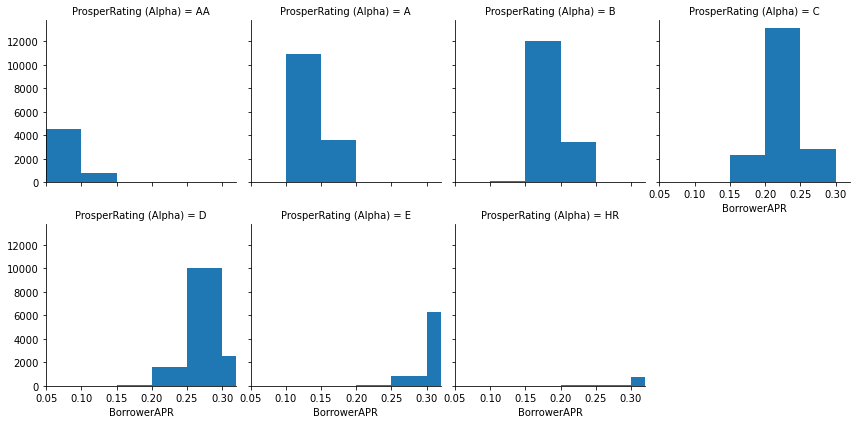

> **Comment:** This grid helps to analyze BorrowerAPR vs ProsperScore on difference letter ratings.This visualization differenate groups of people in terms of APR received based on their rating and scores.
> * For high rating A(A), the borrowers has the lowers APR.
> * The patterns also shows the lowerest rating(HR) of borrowers have the highest APR.
> * The lower the rating, the tendencies of paying higher rates on the loan increases.

## Income Range Vs. Loan Amount Vs. Loan Term

> It is very interesting in each income range what the loan amount looks like when compared to the income range of the borrowers and time period of the loan. 36 month tenure period stands to be the most dominant period across all income range. However, we begin to notice a break from the norm as the loan amount begins to increase across ranges, especially between 25,000 to above 100,000, at this point and above loan amount of 10,000, loan tenure of 60 months seems to be almost at par with 30 months.

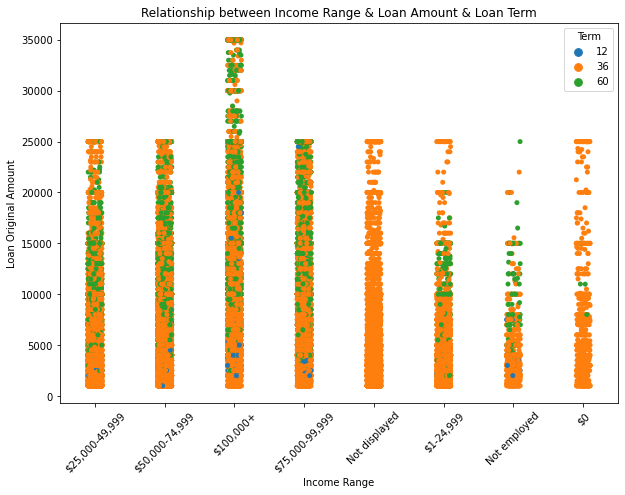

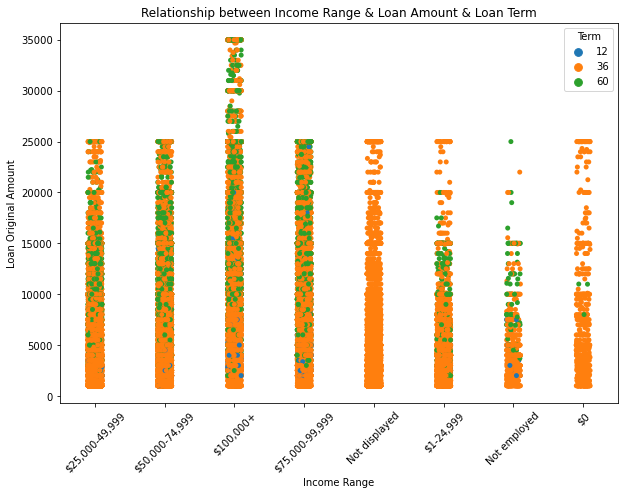

In [59]:
# Plot the distribution of selected variables using stripplot

plt.figure(figsize=[10,7])
sb.stripplot(data=df,x="IncomeRange",y="LoanOriginalAmount",hue="Term", order=df['IncomeRange'].value_counts().index);

#labels and title
plt.xlabel("Income Range");
plt.ylabel("Loan Original Amount");
plt.title("Relationship between Income Range & Loan Amount & Loan Term");
plt.xticks(rotation=45);

> **Comment:** It is very interesting in each income range what the loan amount looks like when compared to the income range of the borrowers and time period of the loan. 36 month tenure period stands to be the most dominant period across all income range. However, we begin to notice a break from the norm as the loan amount begins to increase across ranges, especially between `25,000` to above `100,000`, at this point and above loan amount of `10,000`, loan tenure of 60 months seems to be almost at par with 30 months.